Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [6]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
target = boston["target"]

Y = pd.DataFrame(target, columns=["price"])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print(X_train_scaled.shape)
print(X_train_tsne.shape)

(404, 13)
(404, 2)


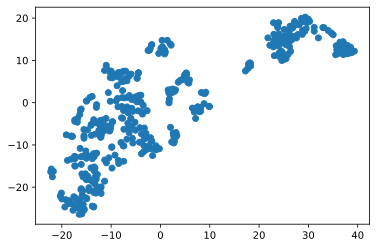

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [19]:
from sklearn.cluster import KMeans

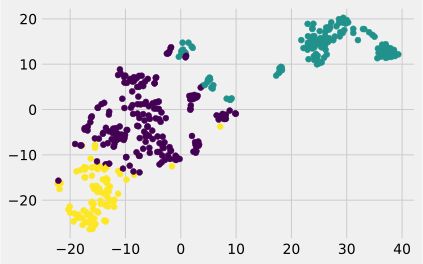

In [20]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

plt.style.use('fivethirtyeight')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [21]:
print('Средние значения price:')
print('Первый кластер: ', Y_train[labels_train == 0].mean())
print('Второй кластер:', Y_train[labels_train == 1].mean())
print('Третий кластер:', Y_train[labels_train == 2].mean())

Средние значения price:
Первый кластер:  price    24.958115
dtype: float64
Второй кластер: price    16.165354
dtype: float64
Третий кластер: price    27.788372
dtype: float64


In [22]:
print('Средние значения CRIM:')
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][labels_train == 2].mean())

Средние значения CRIM:
Первый кластер:  0.42166020942408367
Второй кластер: 10.797028425196853
Третий кластер: 0.07356558139534886


* Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [23]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

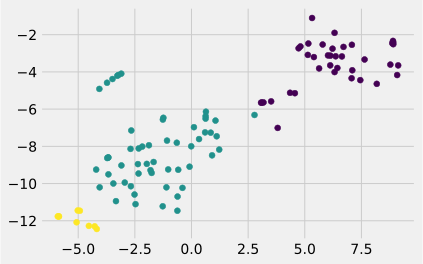

In [24]:
labels_test = model.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [30]:
print('Средние значения price:')
print('Первый кластер: ', Y_test[labels_test == 0].mean())
print('Второй кластер:', Y_test[labels_test == 1].mean())
print('Третий кластер:', Y_test[labels_test == 2].mean())


Средние значения price:
Первый кластер:  price    16.710526
dtype: float64
Второй кластер: price    22.690909
dtype: float64
Третий кластер: price    34.311111
dtype: float64


In [29]:
print('Средние значения CRIM:')
print('Первый кластер: ', X_test['CRIM'][labels_test == 0].mean())
print('Второй кластер:', X_test['CRIM'][labels_test== 1].mean())
print('Третий кластер:', X_test['CRIM'][labels_test== 2].mean())

Средние значения CRIM:
Первый кластер:  9.419181842105264
Второй кластер: 0.21929690909090907
Третий кластер: 0.04070333333333334
